In [2]:
import numpy as np
import pandas as pd

import seaborn as sns


In [3]:
 df=pd.read_csv("employee_data.csv")

In [4]:
df.head()

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor
1,2,Employee_2,Sales,2015-04-01,28,101295,5170,12,Average
2,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent
3,4,Employee_4,Sales,2015-09-28,29,41111,7088,14,Excellent
4,5,Employee_5,Sales,2015-12-27,33,67504,11331,3,Poor


In [5]:
df.shape


(100, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_ID        100 non-null    int64 
 1   Name               100 non-null    object
 2   Department         100 non-null    object
 3   Joining_Date       100 non-null    object
 4   Age                100 non-null    int64 
 5   Salary             100 non-null    int64 
 6   Bonus              100 non-null    int64 
 7   Work_Experience    100 non-null    int64 
 8   Performance_Score  100 non-null    object
dtypes: int64(5), object(4)
memory usage: 7.2+ KB


In [7]:
df.dropna()

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor
1,2,Employee_2,Sales,2015-04-01,28,101295,5170,12,Average
2,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent
3,4,Employee_4,Sales,2015-09-28,29,41111,7088,14,Excellent
4,5,Employee_5,Sales,2015-12-27,33,67504,11331,3,Poor
...,...,...,...,...,...,...,...,...,...
95,96,Employee_96,IT,2038-05-30,40,63828,8966,1,Poor
96,97,Employee_97,Sales,2038-08-28,41,48711,9079,13,Poor
97,98,Employee_98,Finance,2038-11-26,53,33420,9987,3,Average
98,99,Employee_99,Finance,2039-02-24,28,30301,8799,11,Good


In [8]:
df.duplicated().any()

np.False_

In [9]:
df["JD"]=pd.to_datetime(df["Joining_Date"])

In [10]:
df["years"]=df["JD"].dt.year
df["months"]=df["JD"].dt.month

In [11]:

df["months"].head()


0     1
1     4
2     6
3     9
4    12
Name: months, dtype: int32

In [12]:
df["years"].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: years, dtype: int32

In [13]:
df["Department"].value_counts()

Department
Marketing    26
Finance      21
Sales        19
HR           18
IT           16
Name: count, dtype: int64

In [14]:
grouped=df.groupby("Department")

In [15]:
grouped.get_group("IT")["Salary"].mean()

np.float64(75752.375)

In [16]:
df.groupby("Department")["Salary"].mean()

Department
Finance      64052.952381
HR           69418.833333
IT           75752.375000
Marketing    73712.807692
Sales        71215.842105
Name: Salary, dtype: float64

In [17]:
df.groupby("Department")["Salary"].max()

Department
Finance      116416
HR           103744
IT           118614
Marketing    113879
Sales        107371
Name: Salary, dtype: int64

In [18]:
df.groupby("Department")["Salary"].min()

Department
Finance      30301
HR           32049
IT           34499
Marketing    32869
Sales        35539
Name: Salary, dtype: int64

In [19]:
df.groupby("Department").agg({"Salary":"sum","Bonus":"mean"})

,Salary,Bonus
Department,,
Finance,1345112,7041.190476
HR,1249539,8296.944444
IT,1212038,7047.125000
Marketing,1916533,8003.846154
Sales,1353101,9365.052632


In [20]:
scoremap={"Excellent":4,"Good":3,"Average":2,"Poor":1}
df["Performance"]=df["Performance_Score"].map(scoremap)

In [21]:
df.head()

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor,2015-01-01,2015,1,1
1,2,Employee_2,Sales,2015-04-01,28,101295,5170,12,Average,2015-04-01,2015,4,2
2,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent,2015-06-30,2015,6,4
3,4,Employee_4,Sales,2015-09-28,29,41111,7088,14,Excellent,2015-09-28,2015,9,4
4,5,Employee_5,Sales,2015-12-27,33,67504,11331,3,Poor,2015-12-27,2015,12,1


In [22]:
avgscore=df.groupby("Department")["Performance"].mean()

In [23]:
avgscore

Department
Finance      2.523810
HR           2.444444
IT           2.312500
Marketing    2.769231
Sales        2.789474
Name: Performance, dtype: float64

In [24]:
team=avgscore.idxmax()
score=avgscore.max()
team,score


('Sales', np.float64(2.789473684210526))

In [25]:
top5=df.sort_values("Salary")
top5.tail(5)


,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor,2015-01-01,2015,1,1
11,12,Employee_12,IT,2017-09-17,35,115981,5327,10,Average,2017-09-17,2017,9,2
59,60,Employee_60,Finance,2029-07-16,33,116416,10173,7,Poor,2029-07-16,2029,7,1
54,55,Employee_55,IT,2028-04-22,45,116831,6780,5,Poor,2028-04-22,2028,4,1
2,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent,2015-06-30,2015,6,4


In [26]:
bin=[22,30,40,50,55]
label=['22-30','31-40','41-50','55+']
df["agegrp"]=pd.cut(df["Age"],bins=bin,labels=label)

In [27]:
df.head(1)

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance,agegrp
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor,2015-01-01,2015,1,1,41-50


In [28]:
df.groupby('agegrp')["Salary"].mean()

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_8800\1633010226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('agegrp')["Salary"].mean()


agegrp
22-30    69559.892857
31-40    69385.714286
41-50    76868.266667
55+      63379.058824
Name: Salary, dtype: float64

In [29]:
df.corr(numeric_only=True)

,Employee_ID,Age,Salary,Bonus,Work_Experience,years,months,Performance
Employee_ID,1.000000,-0.004947,0.001242,0.158822,-0.103674,0.999168,-0.002409,-0.086788
Age,-0.004947,1.000000,0.002747,0.065169,-0.163211,-0.006749,0.044935,-0.081745
Salary,0.001242,0.002747,1.000000,-0.081674,-0.059635,-0.002847,0.111855,-0.193958
Bonus,0.158822,0.065169,-0.081674,1.000000,-0.103419,0.163227,-0.122836,-0.010832
Work_Experience,-0.103674,-0.163211,-0.059635,-0.103419,1.000000,-0.101986,-0.037647,0.303537
years,0.999168,-0.006749,-0.002847,0.163227,-0.101986,1.000000,-0.043031,-0.080882
months,-0.002409,0.044935,0.111855,-0.122836,-0.037647,-0.043031,1.000000,-0.139433
Performance,-0.086788,-0.081745,-0.193958,-0.010832,0.303537,-0.080882,-0.139433,1.000000


In [30]:
col=['Age','Salary','Bonus','Work_Experience']
df[col].corr()

,Age,Salary,Bonus,Work_Experience
Age,1.000000,0.002747,0.065169,-0.163211
Salary,0.002747,1.000000,-0.081674,-0.059635
Bonus,0.065169,-0.081674,1.000000,-0.103419
Work_Experience,-0.163211,-0.059635,-0.103419,1.000000


In [31]:
df[df["Salary"]>80000].head(3)

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance,agegrp
0,1,Employee_1,Marketing,2015-01-01,49,113879,2606,2,Poor,2015-01-01,2015,1,1,41-50
1,2,Employee_2,Sales,2015-04-01,28,101295,5170,12,Average,2015-04-01,2015,4,2,22-30
2,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent,2015-06-30,2015,6,4,22-30


In [32]:
df[df['Salary']>80000]['Name'].head(3)

0    Employee_1
1    Employee_2
2    Employee_3
Name: Name, dtype: object

In [33]:
df[(df['Salary']>80000) & (df['Bonus']>10000)].head(3)

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance,agegrp
23,24,Employee_24,HR,2020-09-01,53,102694,14913,1,Good,2020-09-01,2020,9,3,55+
38,39,Employee_39,HR,2024-05-13,49,83351,14533,3,Poor,2024-05-13,2024,5,1,41-50
48,49,Employee_49,Finance,2026-10-30,24,107505,10716,5,Poor,2026-10-30,2026,10,1,22-30


In [34]:
df[(df['Salary']>80000) & (df['Bonus']>10000)]['Name'].head(3)

23    Employee_24
38    Employee_39
48    Employee_49
Name: Name, dtype: object

In [35]:
dept_heads = pd.DataFrame({
    "Department": ["IT", "HR", "Finance", "Sales"],
    "Head": ["Alice", "Bob", "Charlie", "Diana"]
})


In [36]:
merged=df.merge(dept_heads,on='Department')
merged.head(3)

,Employee_ID,Name,Department,Joining_Date,Age,Salary,Bonus,Work_Experience,Performance_Score,JD,years,months,Performance,agegrp,Head
0,2,Employee_2,Sales,2015-04-01,28,101295,5170,12,Average,2015-04-01,2015,4,2,22-30,Diana
1,3,Employee_3,IT,2015-06-30,30,118614,2699,10,Excellent,2015-06-30,2015,6,4,22-30,Alice
2,4,Employee_4,Sales,2015-09-28,29,41111,7088,14,Excellent,2015-09-28,2015,9,4,22-30,Diana


In [37]:
pd.pivot_table(df,index="Department",values="Performance_Score",aggfunc="count")

,Performance_Score
Department,
Finance,21
HR,18
IT,16
Marketing,26
Sales,19


In [38]:
pd.crosstab(df['Department'],df['agegrp'])

agegrp,22-30,31-40,41-50,55+
Department,,,,
Finance,5,2,6,7
HR,6,4,3,4
IT,4,4,7,1
Marketing,6,7,7,4
Sales,7,4,7,1


<Axes: xlabel='Salary', ylabel='Count'>

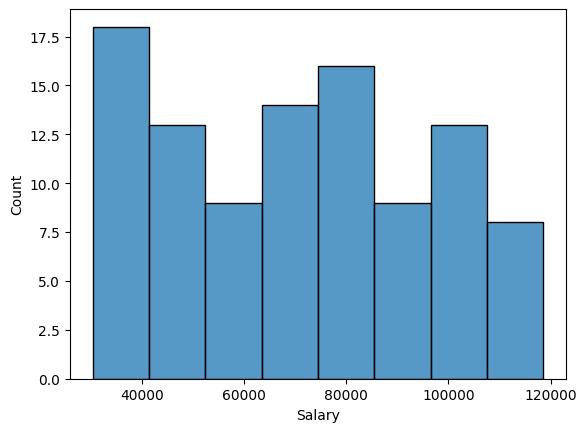

In [39]:
sns.histplot(df['Salary'])

<Axes: xlabel='Salary', ylabel='Age'>

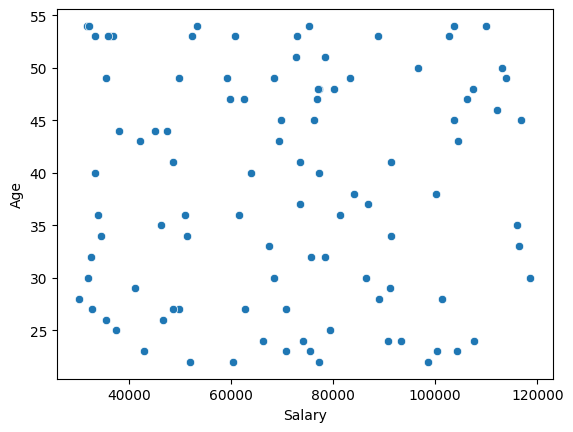

In [40]:
sns.scatterplot(data=df,x='Salary',y='Age')

<Axes: xlabel='Department', ylabel='Salary'>

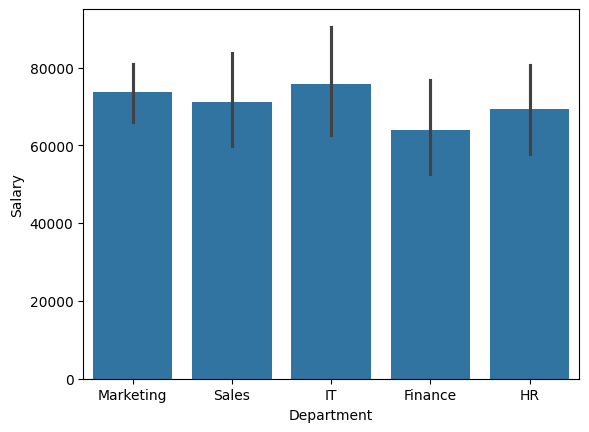

In [41]:
sns.barplot(data=df,y="Salary",x="Department")

<Axes: xlabel='Performance_Score', ylabel='count'>

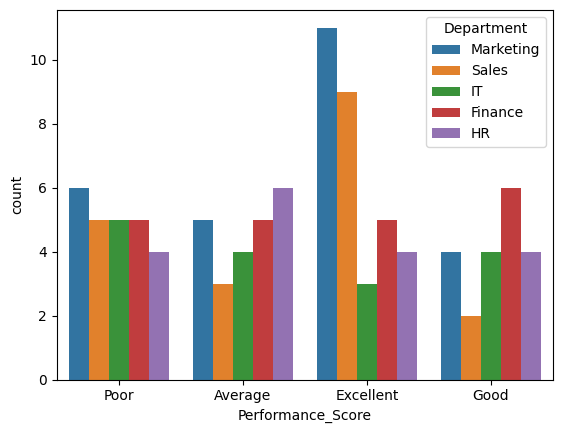

In [42]:
sns.countplot(data=df,hue="Department",x="Performance_Score")

<Axes: >

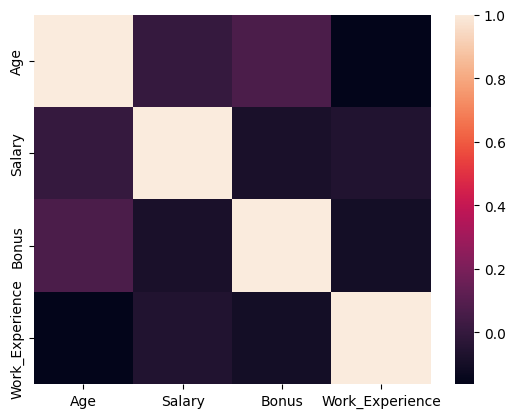

In [43]:
sns.heatmap(df[col].corr())

<Axes: xlabel='Salary', ylabel='Department'>

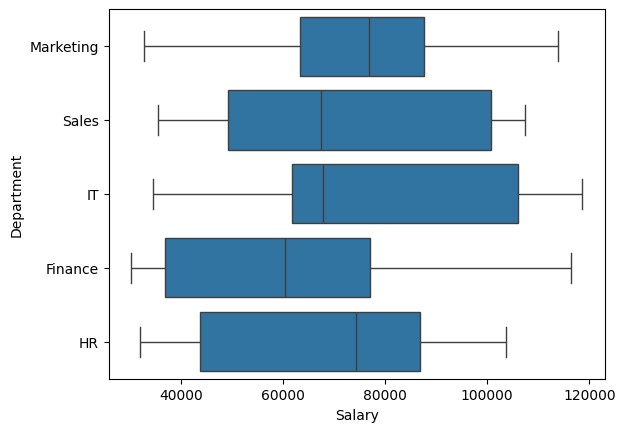

In [44]:
sns.boxplot(data=df,x="Salary",y="Department")

In [46]:
df.to_csv("upgraded employee_data.csv",index=False)